<a href="https://colab.research.google.com/github/diaruizja/DS_Optimizacion_parametros/blob/master/Optimizaci%C3%B3n_de_par%C3%A1metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MiniProyecto 4: Optimización de parámetros

¡Bienvenidos al cuarto (mini)proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando (por última vez) con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso es optimizar los parámetros de los algoritmos que usamos en el proyecto pasado.

El dataset es el mismo del proyecto 3. Recordemos que las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadréatico medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Pandas - Levantamos el dataset

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = '/content/drive/My Drive/Data Science/Entregas de proyectos/Entrega #4/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

**Separá** el dataset en entrenamiento (80%) y test (20%) utilizando como target la columna `price_aprox_usd`

In [ ]:
# Hacé la separación en esta celda
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, "\n", y_train.shape, "\n", X_test.shape, "\n", y_test.shape)

(5100, 58) 
 (5100,) 
 (1276, 58) 
 (1276,)


In [ ]:
# Esto es lo que hace
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape[0], X_test.shape[0])

5100 1276


## Scikit-learn - Entrenamiento

Para repasar los parámetros de árboles de decisión en Scikit-learn: 

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

En primer lugar veamos como hacer cross validation. Para eso necesitamos definir la cantidad de folds, en este caso vamos a usar 5.

GridSearchCV nos permite testear a través de un espacio de búsqueda de parámetros la mejor combinación posible dado un estimador.

Por ejemplo, en este caso probamos la profundidad máxima y la máxima cantidad de features para hacer los split. Ambos entre 1 y 5.
Recordemos que para hacer la optimización scikit-learn usa la métrica `neg_mean_squared_error` en lugar de `mean_squared_error`.

**Creá** una variable `param_grid` con valores del 1 al 5 para los atributos `max_depth` y `max_features`. 

In [ ]:
# Creá en esta celda la variable param_grid
param_grid = [{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4, 5]}]

**Importá** `GridSearchCV` y `DecisionTreeRegressor`.

**Creá** una variable `grid_search` y asignale un `GridSearchCV` que recorra el `param_grid` que creaste con el algoritmos `DecisionTreeRegressor` y el un scoring de `neg_mean_squared_error`

In [ ]:
# Importa y crea un GridSearchCV en esta celda
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

A continuación, realizá el `fit` del `grid_search` con el conjunto de entrenamiento

In [ ]:
# Hace el fit de grid search en esta celda
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5],
                          'max_features': [1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', 

Revisemos los resultados. Recordemos que no están expresados en RMSE.

In [ ]:
grid_search.scorer_ #este comando me deja dudas de porque no me muestra ningun resultado.

make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
#Se muestra una visualizacion amplia de los resultados obtenidos con el GridSearchCV
grid_search.cv_results_

**Mostrá** los `grid_scores` obtenidos durante el `grid_search`

In [ ]:
# Mostrá los grid_scores en esta celda
grid_search.cv_results_["mean_train_score"]

array([-9.55588857e+08, -9.57468890e+08, -9.72983861e+08, -9.23628746e+08,
       -9.74037208e+08, -9.27697741e+08, -9.22782382e+08, -9.18594195e+08,
       -9.17251310e+08, -9.26891537e+08, -9.46259883e+08, -9.06038074e+08,
       -8.53680623e+08, -7.71936220e+08, -8.64641322e+08, -9.60984110e+08,
       -9.35611617e+08, -7.91252565e+08, -6.90511634e+08, -8.74058455e+08,
       -8.39258972e+08, -8.16057480e+08, -7.53021816e+08, -8.00184436e+08,
       -8.24706576e+08])

In [ ]:
#en esta celda se halla el RMSE para los scores resultantes del train
np.sqrt(-grid_search.cv_results_["mean_train_score"])

array([30912.60029123, 30942.99420572, 31192.68922801, 30391.26100603,
       31209.56916574, 30458.13095171, 30377.33335566, 30308.31891279,
       30286.15707341, 30444.89344099, 30761.33746805, 30100.46634338,
       29217.81345087, 27783.74020398, 29404.78399914, 30999.74371442,
       30587.76907368, 28129.21194524, 26277.58806287, 29564.47962086,
       28969.96672043, 28566.71978936, 27441.24297365, 28287.53145448,
       28717.70491712])

In [ ]:
#en esta celda se muestran los scores obtenidos para el conjunto de test por medio de la metrica del GridSearchCV
grid_search.cv_results_["mean_test_score"]

array([-9.67815478e+08, -9.67910484e+08, -9.73432428e+08, -9.26098952e+08,
       -9.78231080e+08, -9.39192560e+08, -9.15148163e+08, -9.13017431e+08,
       -9.14864707e+08, -9.26966397e+08, -9.52605383e+08, -9.16501632e+08,
       -8.60045736e+08, -7.78662849e+08, -8.67461859e+08, -9.67902756e+08,
       -9.49797182e+08, -7.98821216e+08, -7.13698125e+08, -8.83000682e+08,
       -8.62664509e+08, -8.27410460e+08, -7.83031651e+08, -8.20222490e+08,
       -8.64001486e+08])

In [ ]:
#en esta celda se halla el RMSE para los scores resultantes del test
np.sqrt(-grid_search.cv_results_["mean_test_score"])

array([31109.73284714, 31111.25977036, 31199.87865805, 30431.87394255,
       31276.68588291, 30646.24870245, 30251.41587674, 30216.17830125,
       30246.73051206, 30446.12285887, 30864.30597708, 30273.77796642,
       29326.53637572, 27904.53097374, 29452.70546479, 31111.13556028,
       30818.77969799, 28263.42541355, 26715.12914008, 29715.32738582,
       29371.1509691 , 28764.74334538, 27982.70271826, 28639.52671136,
       29393.90218227])

De esta manera, el valor con mejor resultado (dado el espacio de búsqueda definido) es `max_depth` 3 y `max_features` 3.

**Mostrá** el mejor score y los mejores parámetros encontrados por `grid_search`

In [ ]:
# Mostrás los resultados en esta celda
grid_search.best_score_

-713698124.9712428

In [ ]:
#en esta celda se muestra el RMSE obtenido de mejor score resultante del GridSearchCV
np.sqrt(-grid_search.best_score_)

26715.129140081706

In [ ]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 4}

In [ ]:
rmses_train_score_mss = np.sqrt(-grid_search.cv_results_["mean_train_score"])
rmses_test_score_mss = np.sqrt(-grid_search.cv_results_["mean_test_score"])

ValueError: ignored

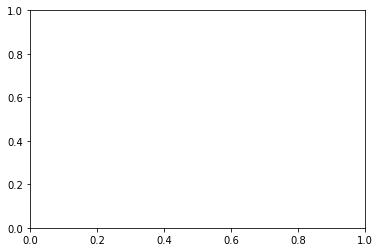

In [ ]:
#este bloque de codigo hace parte de un feedback pero la verdad no la entiendo o no se realmente que me querian mostrar con esto.

import matplotlib.pyplot as plt

plt.plot(range(1, 40), rmses_train_score_mss, label="RMSES Training Score")
plt.plot(range(1, 40), rmses_test_score_mss, label="RMSES Testing Score")
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.xlabel("Max Depth")
plt.ylabel("Rmse")
plt.title("Impacto Max Depth en Rmses Train y Test")
plt.show()

"""
en este campo por iniciativa propia hago una comparacion de los datos evaluando y reajustando con la metrica del RandomizedSearchCV
"""

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(1, 5), 'max_features': sp_randint(1, 5)}

In [ ]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
rand_search.best_params_

{'max_depth': 4, 'max_features': 3}

In [ ]:
rand_search.best_score_

-768876324.1986293

In [ ]:
np.sqrt(-rand_search.best_score_)

27728.619226326962

In [ ]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([31147.778141  , 29840.73094795, 29262.68903496, 30098.10044713,
       29360.90199014, 30232.5795328 , 27842.66273197, 30970.82185247,
       29147.34878895, 29971.82376242])

In [ ]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([31265.33743297, 29999.92754835, 29496.34944762, 30291.79857262,
       29420.42718574, 30082.03338222, 27728.61922633, 31027.97063039,
       28987.77467185, 30282.96063336])

In [ ]:
# Comparacion de los resultados entre RandomizedsearchCV y GridSearchCV
print("Promedio GridSearchCV RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearchCV RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearchCV RMSE:  29821.352289369614
Promedio RandomizedSearchCV RMSE:  29858.31987314379


Se concluye con estas comparaciones que la metrica que mejores resultados arroja es el GridSearchCV

Convertimos a RMSE.

In [ ]:
def nmsq2rmse(score):
    return np.round(np.sqrt(-score), 2)

__Encontrar el mejor modelo para el espacio de búsqueda dado__

* `"min_samples_split": [2, 10, 20]`
* `"max_depth": [None, 2, 5, 10, 15]`
* `"min_samples_leaf": [1, 5, 10, 15]`
* `"max_leaf_nodes": [None, 5, 10, 20]`

Recordemos que `GridSearchCV` tiene como parámetro default `refit=True`. Esto significa que luego de hacer la corrida se ajusta el mejor modelo al conjunto de datos de entrada. De esta manera, se puede predecir directamente usando `best_estimator_`.

In [ ]:
param_grid1 = [{"min_samples_split": [2, 10, 20], "max_depth": [None, 2, 5, 10, 15], "min_samples_leaf": [1, 5, 10, 15], "max_leaf_nodes": [None, 5, 10, 20]}]

In [ ]:
tree_reg1 = DecisionTreeRegressor()
grid_search1 = GridSearchCV(tree_reg1, param_grid1, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True, refit=True)

In [ ]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [None, 2, 5, 10, 15],
                          'max_leaf_nodes': [None, 5, 10, 20],
                          'min_

In [ ]:
optimised_decision_tree = grid_search1.best_estimator_

__Evaluemos en testing el desempeño de este modelo.__

Como venimos trabajando, el resultado en testing será la medición que usaremos como benchmark para comparar este modelos con otros en el futuro, puesto que no estuvo en contacto con el dataset de test para la calibración.

In [ ]:
from sklearn.metrics import mean_squared_error
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
np.round(rmse)

21301.0

Vemos los primeros 10 resultados de la predicción del valor de propiedades.

In [ ]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [ ]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [ ]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,103438.660,23438.660
1,128000.000,135705.882,7705.882
2,150000.000,156075.759,6075.759
3,85000.000,102400.991,17400.991
4,135000.000,135571.622,571.622
5,135000.000,109560.000,25440.000
6,68000.000,75181.250,7181.250
7,110000.000,140444.444,30444.444
8,134000.000,158431.250,24431.250
9,110000.000,76701.202,33298.798
